# 使用LIDA测试世界银行发展指标数据集

本项目旨在使用LIDA（Language Interface for Data Analysis）工具，对预处理后的世界银行发展指标数据集进行全面的功能测试。
我们将覆盖LIDA的核心功能，包括数据总结、可视化目标生成、可视化图表生成、编辑、解释、评估和推荐。

**数据集:** `data/processed/world_bank_processed.csv`

# 1 and 2 配置与初始化

In [1]:
import os
from base64 import b64decode
from IPython.display import Image, display
import pandas as pd
from dotenv import load_dotenv
from lida import Manager, TextGenerationConfig
from lida.components import llm # 如果lida.components.llm 在您的lida版本中不存在，可以直接使用 from lida.utils import llm_utils 并通过 llm_utils.get_llm_provider


load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# 2. 初始化LIDA与GPT后端

# 最常见的方式是 LIDA Manager 会自动寻找 OPENAI_API_KEY 环境变量
lida = Manager(text_gen = llm("openai", model="gpt-3.5-turbo")) 



## 3. 加载和准备数据集

加载预处理后的世界银行发展指标数据。

In [4]:
data_file_path = "data/processed/world_bank_processed.csv"
summary_path = "data/processed/world_bank_summary.json" # LIDA会生成并缓存摘要

df = pd.read_csv(data_file_path)
print("数据集预览 (前5行):")
display(df.head())
print(f"\n数据集共有 {df.shape[0]} 行 和 {df.shape[1]} 列。")
print("\n列名和数据类型:")
df.info()
# 例如，选择国家代码，年份，以及几个关键指标
relevant_columns = ['country_code', 'year', 'GDP_per_capita', 'life_expectancy', 'population', 'internet_users', 'GDP_per_capita_yoy']
df_subset = df[relevant_columns].copy()
print(f"已选择数据子集进行测试，包含列: {df_subset.columns.tolist()}")
data_to_use = df_subset
    


数据集预览 (前5行):


,country_code,year_str,GDP_per_capita,life_expectancy,tertiary_education,population,primary_education,hospital_beds,internet_users,year,GDP_per_capita_yoy,life_expectancy_yoy,tertiary_education_yoy,population_yoy,primary_education_yoy,hospital_beds_yoy,internet_users_yoy
0,Afghanistan,2010,542.871030,60.702,NaN,28284089.0,0.62581,0.43,4.00,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2011,525.426983,61.250,0.33477,29347708.0,0.66345,0.45,5.00,2011,-3.213295,0.902771,NaN,3.760485,6.014601,4.651163,25.000000
2,Afghanistan,2012,568.929021,61.735,0.33477,30560034.0,0.66925,0.47,5.45,2012,8.279369,0.791837,0.000000,4.130905,0.874219,4.444444,9.000000
3,Afghanistan,2013,580.603833,62.188,0.33477,31622704.0,0.65533,0.46,5.90,2013,2.052068,0.733781,0.000000,3.477319,-2.079942,-2.127660,8.256881
4,Afghanistan,2014,575.146246,62.260,0.26644,32792523.0,0.65402,0.46,7.00,2014,-0.939985,0.115778,-20.411026,3.699301,-0.199898,0.000000,18.644068



数据集共有 3458 行 和 17 列。

列名和数据类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_code            3458 non-null   object 
 1   year_str                3458 non-null   int64  
 2   GDP_per_capita          3458 non-null   float64
 3   life_expectancy         3458 non-null   float64
 4   tertiary_education      3457 non-null   float64
 5   population              3458 non-null   float64
 6   primary_education       3458 non-null   float64
 7   hospital_beds           3458 non-null   float64
 8   internet_users          3458 non-null   float64
 9   year                    3458 non-null   int64  
 10  GDP_per_capita_yoy      3192 non-null   float64
 11  life_expectancy_yoy     3192 non-null   float64
 12  tertiary_education_yoy  3191 non-null   float64
 13  population_yoy          3192 non-null   float64
 14  primary_

## 4. 数据总结 (Data Summarization)

使用 `lida.summarize()` 为数据集生成一个紧凑的摘要。LIDA会分析列的数据类型、统计特性等。

In [5]:

try:
    # 检查 data_to_use 是否已定义且不为空
    if 'data_to_use' in locals() and not data_to_use.empty:
        summary = lida.summarize(
            data_to_use,
            summary_method="llm"
        )

        if summary:
            print("\n===================== 数据摘要 (Summary) =====================")
            print(f"摘要名称: {summary.get('name', 'N/A')}")
            print(f"数据集描述: {summary.get('dataset_description', 'N/A')}")
            print(f"字段数量: {len(summary.get('fields', []))}")
            for field in summary.get('fields', []):
                print(f"  - 列: {field['column']}, 类型: {field['properties']['dtype']}, 唯一值: {field['properties']['num_unique_values']}")
        else:
            print("数据摘要生成失败或返回为空。")
    else:
        print("错误: `data_to_use` 未定义或为空，无法生成摘要。请检查上一步数据加载。")

except Exception as e:
    print(f"生成数据摘要时发生错误: {e}")
    raise



===================== 数据摘要 (Summary) =====================
摘要名称: World_Development_Indicators
数据集描述: Dataset containing various indicators of economic and social development for countries around the world.
字段数量: 7
  - 列: country_code, 类型: category, 唯一值: 266
  - 列: year, 类型: number, 唯一值: 13
  - 列: GDP_per_capita, 类型: number, 唯一值: 3307
  - 列: life_expectancy, 类型: number, 唯一值: 3280
  - 列: population, 类型: number, 唯一值: 3417
  - 列: internet_users, 类型: number, 唯一值: 966
  - 列: GDP_per_capita_yoy, 类型: number, 唯一值: 3055


## 5. 可视化目标生成 (Goal Generation)

基于数据摘要，使用 `lida.goals()` 生成一组可视化目标。可以指定生成数量和“角色 (persona)”。

In [7]:
goals = []
if 'summary' in locals() and summary:
    goal_gen_config = TextGenerationConfig(
        n=5,
        temperature=0.7,
        persona="An economist looking for insights into country development over the past decade",
        use_cache=True
    )

    goals = lida.goals(summary, textgen_config=goal_gen_config)
    
    if goals:
        print("\n===================== 可视化目标 (Goals) =====================")
        for i, goal in enumerate(goals):
            print(f"\n--- Goal {i+1} ---")
            print(f"问题: {goal.question}")
            print(f"可视化建议: {goal.visualization}")
            print(f"理由: {goal.rationale}")
    else:
        print("警告: 未能生成可视化目标，或列表为空。")
        
else:
    print("错误: 数据摘要 'summary' 不可用，无法生成目标。请确保上一步成功。")


===================== 可视化目标 (Goals) =====================

--- Goal 1 ---
问题: How does GDP per capita vary across different countries?
可视化建议: Bar chart of GDP_per_capita by country_code
理由: By visualizing the GDP per capita across countries, we can identify which countries have higher or lower economic prosperity.

--- Goal 2 ---
问题: What is the trend in life expectancy over the years?
可视化建议: Line chart of life_expectancy over year
理由: Tracking the trend in life expectancy over time can reveal improvements or deteriorations in healthcare and living conditions.

--- Goal 3 ---
问题: Which countries have the highest population counts?
可视化建议: Bar chart of population by country_code
理由: Understanding the countries with the highest population counts can provide insights into demographic patterns and resource allocation.

--- Goal 4 ---
问题: What is the percentage of internet users in different countries?
可视化建议: Bar chart of internet_users by country_code
理由: Comparing internet usage rates acr

## 6. 可视化图表生成 (Visualization Generation)

为指定的目标生成、执行和筛选可视化代码。LIDA 将可视化表示为代码。
我们将选择一个上面生成的目标，并尝试使用不同的库（如 matplotlib, seaborn）生成图表。

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




===================== 生成的图表 (Charts) - 共 2 个 =====================

--- Chart 1 (Library: matplotlib) ---
图表预览:


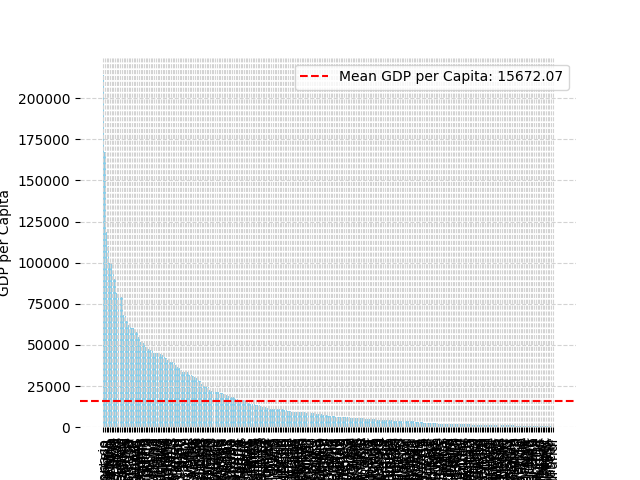


--- Chart 2 (Library: seaborn) ---
图表预览:


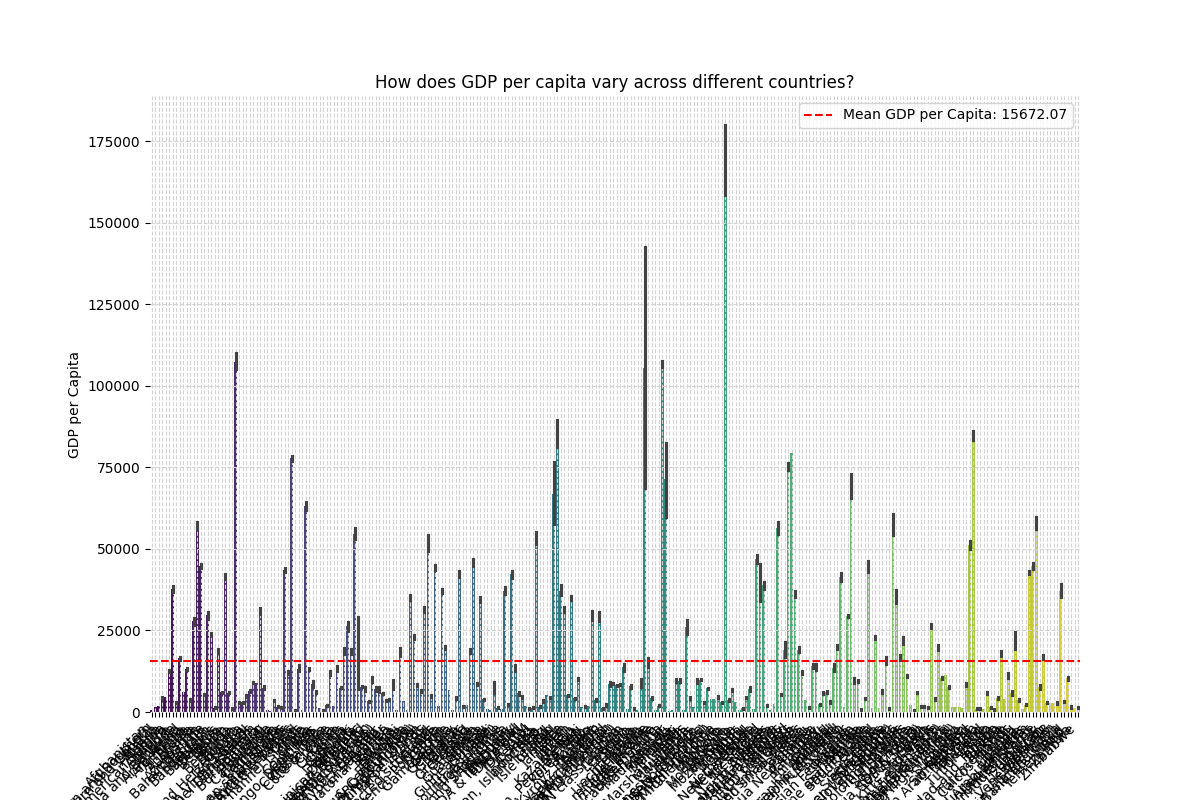

In [8]:
charts = []

if 'goals' in locals() and goals:
    selected_goal_index = 0
    if len(goals) > selected_goal_index:
        selected_goal = goals[selected_goal_index]
        
        viz_gen_config = TextGenerationConfig(
            temperature=0.2, 
            use_cache=True, 
            max_tokens=1500
        )

        # 尝试使用 matplotlib
        matplotlib_charts = lida.visualize(
            summary=summary,
            goal=selected_goal,
            library="matplotlib",
            textgen_config=viz_gen_config
        )
        if matplotlib_charts:
            charts.extend(matplotlib_charts)
        else:
            print("警告: 使用 matplotlib 未能生成图表。")

        # 尝试使用 seaborn
        seaborn_charts = lida.visualize(
            summary=summary,
            goal=selected_goal,
            library="seaborn",
            textgen_config=viz_gen_config
        )
        if seaborn_charts:
            charts.extend(seaborn_charts)
        else:
            print("警告: 使用 seaborn 未能生成图表。")
            
        if charts:
            print(f"\n===================== 生成的图表 (Charts) - 共 {len(charts)} 个 =====================")
            for i, chart_obj in enumerate(charts):
                print(f"\n--- Chart {i+1} (Library: {chart_obj.library}) ---")
                if chart_obj.raster and isinstance(chart_obj.raster, str):
                    print("图表预览:")
                    image_data = b64decode(chart_obj.raster)
                    display(Image(data=image_data))
                elif chart_obj.raster:
                    print(f"警告: chart.raster 不是预期的字符串格式: {type(chart_obj.raster)}. 无法直接显示为图片。")
                else:
                    print("未能生成图表预览 (raster 数据为空)。")
        else:
            print("警告: 未能生成任何图表。")
    else:
        print(f"警告: 选择的目标索引 {selected_goal_index} 超出范围。可用目标数量: {len(goals)}")
else:
    print("错误: 可视化目标 'goals' 不可用，无法生成图表。")

## 7. 可视化编辑 (Visualization Editing)

使用自然语言指令编辑已生成的可视化。

选择图表 (来自 matplotlib) 进行编辑。
原始图表预览:


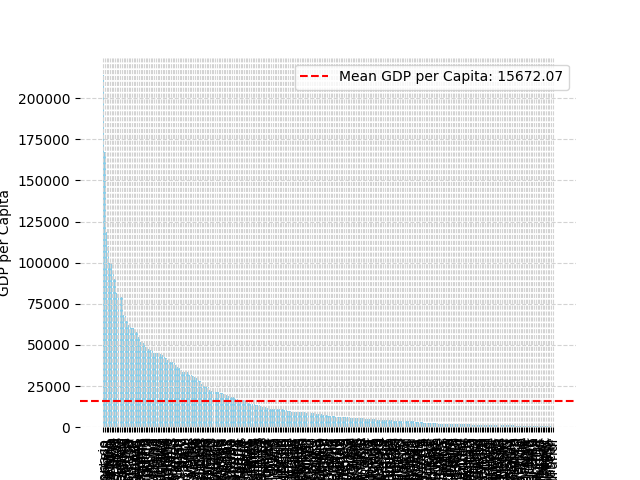

编辑指令: ["Make the chart title 'Top 10 Countries by GDP per capita'"]

===================== 编辑后的图表 (共 1 个) =====================

--- Edited Chart 1 ---


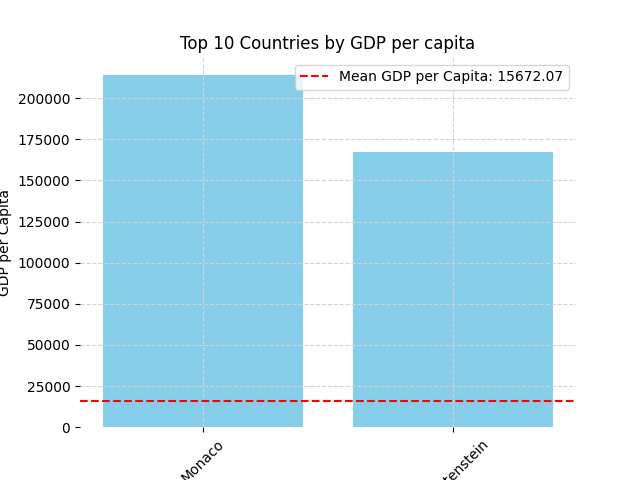

In [9]:
edited_charts_list = []
if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        original_chart = charts[0]
        print(f"选择图表 (来自 {original_chart.library}) 进行编辑。")
        print("原始图表预览:")
        
        if original_chart.raster and isinstance(original_chart.raster, str):
            image_data = b64decode(original_chart.raster)
            display(Image(data=image_data))
        elif original_chart.raster:
             print(f"原始图表数据 (raster) 不是预期的字符串格式: {type(original_chart.raster)}。无法显示。")
        else:
            print("未能生成原始图表预览 (raster 数据为空)。")

        instructions = [
            "Make the chart title 'Top 10 Countries by GDP per capita'",
        ]
        print(f"编辑指令: {instructions}")

        edit_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True, max_tokens=1500)
        
        edited_chart_results = lida.edit(
            code=original_chart.code,
            summary=summary,
            instructions=instructions,
            library=original_chart.library,
            textgen_config=edit_textgen_config
        )
        
        if edited_chart_results:
            edited_charts_list = edited_chart_results if isinstance(edited_chart_results, list) else [edited_chart_results]
            print(f"\n===================== 编辑后的图表 (共 {len(edited_charts_list)} 个) =====================")
            for i, edited_chart in enumerate(edited_charts_list):
                print(f"\n--- Edited Chart {i+1} ---")
                if edited_chart.raster and isinstance(edited_chart.raster, str):
                    image_data = b64decode(edited_chart.raster)
                    display(Image(data=image_data))
                elif edited_chart.raster:
                    print(f"编辑后的图表数据 (raster) 不是预期的字符串格式: {type(edited_chart.raster)}。无法显示。")
                else:
                    print("未能生成编辑后图表的预览 (raster 数据为空)。")
        else:
            print("编辑图表失败或未返回结果。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法进行编辑。")
else:
    print("错误: 没有可供编辑的图表 'charts'。")

## 8. 可视化解释 (Visualization Explanation)

为给定的可视化生成自然语言解释（可访问性、数据转换、代码等）。

In [10]:
import json # 为优化JSON输出而添加

if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        chart_to_explain = charts[0]
        
        explanation = lida.explain(code=chart_to_explain.code, library=chart_to_explain.library)
        if explanation:
            print("\n===================== 图表解释 (Explanation) =====================")
            # 使用json.dumps优化JSON输出，indent实现缩进美化示
            print(json.dumps(explanation, indent=4, ensure_ascii=False))
        else:
            print("警告: 生成图表解释失败或返回为空。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法生成解释。")
else:
    print("错误: 没有可供解释的图表 'charts'。")


===================== 图表解释 (Explanation) =====================
[
    [
        {
            "section": "accessibility",
            "code": "None",
            "explanation": "The chart is a bar chart with sky blue bars representing GDP per capita for each country. The x-axis shows the country codes, and the y-axis represents GDP per capita. The goal of the chart is to visualize and compare GDP per capita values across different countries. The main insight is the relative GDP per capita values of different countries."
        },
        {
            "section": "transformation",
            "code": "data_sorted = data.sort_values('GDP_per_capita', ascending=False)",
            "explanation": "This section sorts the data by GDP per capita in descending order, which helps in arranging the data for plotting in a meaningful way."
        },
        {
            "section": "visualization",
            "code": "plt.bar(data_sorted['country_code'], data_sorted['GDP_per_capita'], color='sk

## 9. 可视化评估与修复 (Visualization Evaluation and Repair)

评估给定的可视化，找到修复指令（可能由人工编写或AI生成），并修复可视化。

In [11]:


evaluations_list = []
if 'charts' in locals() and charts and 'goals' in locals() and goals:
    if charts[0] and charts[0].code and goals[0]:
        chart_to_evaluate = charts[0]
        corresponding_goal = goals[0]

        eval_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True)

        evaluations = lida.evaluate(
            code=chart_to_evaluate.code,
            goal=corresponding_goal,
            library=chart_to_evaluate.library,
            textgen_config=eval_textgen_config
        )
        
        if evaluations:
            evaluations_list = evaluations
            print("\n===================== 图表评估 (Evaluations) =====================")
            for i, evaluation in enumerate(evaluations_list):
                print(f"\n--- Evaluation {i+1} ---")
                # 使用json.dumps优化输出，default=str处理无法直接序列化的对象
                print(json.dumps(evaluation, indent=4, ensure_ascii=False, default=str))
        else:
            print("警告: 生成图表评估失败或返回为空。")
    else:
        print("警告: 选中的原始图表/目标无效，无法进行评估。")
else:
    print("错误: 没有图表 'charts' 或目标 'goals' 可供评估。")


===================== 图表评估 (Evaluations) =====================

--- Evaluation 1 ---
[
    {
        "dimension": "bugs",
        "score": 8,
        "rationale": "The code does not have any syntax errors or logical bugs. However, there is a potential issue with the axhline function where the mean GDP per capita is calculated using the entire dataset, which may not be appropriate."
    },
    {
        "dimension": "transformation",
        "score": 7,
        "rationale": "The data is sorted based on GDP per capita, which is appropriate for the visualization goal. However, additional transformations such as filtering or grouping could provide more insights."
    },
    {
        "dimension": "compliance",
        "score": 8,
        "rationale": "The code partially meets the specified goal by showing how GDP per capita varies across different countries. However, it could be improved by providing more context or comparison."
    },
    {
        "dimension": "type",
        "score": 6

## 10. 可视化推荐 (Visualization Recommendation)

基于数据集摘要，生成一组推荐的可视化图表。


===================== 可视化推荐 (Recommendations) =====================

--- Recommendation 1 (Library: matplotlib) ---


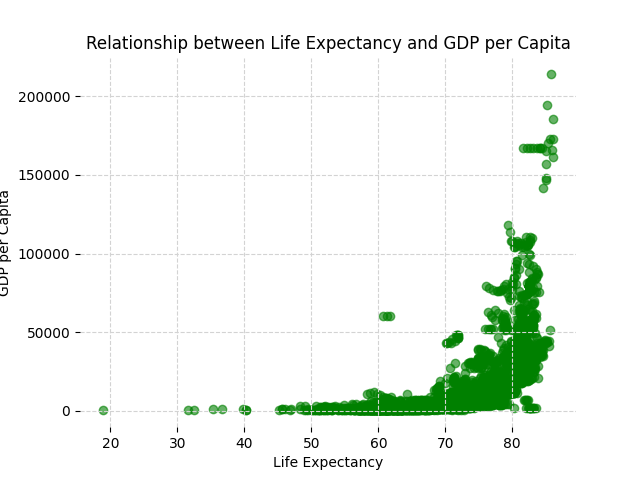

In [12]:
recommendations_list = []
if 'summary' in locals() and summary:
    rec_textgen_config = TextGenerationConfig(n=3, temperature=0.5, use_cache=True, max_tokens=1500)

    reference_chart_code = charts[0].code if ('charts' in locals() and charts and charts[0]) else None
    library_for_recommendation = charts[0].library if reference_chart_code else "matplotlib"

    recommendations = lida.recommend(
        code=reference_chart_code,
        summary=summary, 
        n=3, 
        library=library_for_recommendation,
        textgen_config=rec_textgen_config
    )
    
    if recommendations:
        recommendations_list = recommendations
        print("\n===================== 可视化推荐 (Recommendations) =====================")
        for i, rec_chart in enumerate(recommendations_list):
            print(f"\n--- Recommendation {i+1} (Library: {rec_chart.library}) ---")
            if rec_chart.raster and isinstance(rec_chart.raster, str):
                image_data = b64decode(rec_chart.raster)
                display(Image(data=image_data))     
            else:
                print("未能生成推荐图表的预览 (raster 数据为空)。")
    else:
        print("警告: 生成可视化推荐失败或返回为空。")
else:
    print("错误: 数据摘要 'summary' 不可用，无法生成推荐。")

选择图表 (来自 matplotlib) 进行编辑。
原始图表预览:


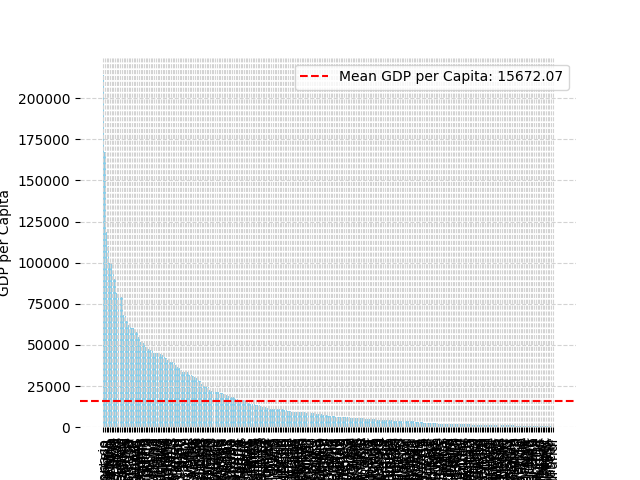

编辑指令: ["Make the chart title 'Top 10 Countries by GDP per capita'"]

===================== 编辑后的图表 (共 1 个) =====================

--- Edited Chart 1 ---


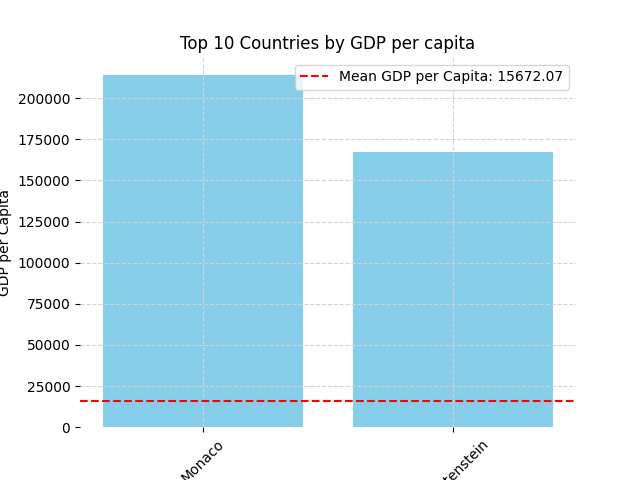

In [ ]:
edited_charts_list = []
if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        original_chart = charts[0]
        print(f"选择图表 (来自 {original_chart.library}) 进行编辑。")
        print("原始图表预览:")
        
        if original_chart.raster and isinstance(original_chart.raster, str):
            image_data = b64decode(original_chart.raster)
            display(Image(data=image_data))
        elif original_chart.raster:
             print(f"原始图表数据 (raster) 不是预期的字符串格式: {type(original_chart.raster)}。无法显示。")
        else:
            print("未能生成原始图表预览 (raster 数据为空)。")

        instructions = [
            "Make the chart title 'Top 10 Countries by GDP per capita'",
        ]
        print(f"编辑指令: {instructions}")

        edit_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True, max_tokens=1500)
        
        edited_chart_results = lida.edit(
            code=original_chart.code,
            summary=summary,
            instructions=instructions,
            library=original_chart.library,
            textgen_config=edit_textgen_config
        )
        
        if edited_chart_results:
            edited_charts_list = edited_chart_results if isinstance(edited_chart_results, list) else [edited_chart_results]
            print(f"\n===================== 编辑后的图表 (共 {len(edited_charts_list)} 个) =====================")
            for i, edited_chart in enumerate(edited_charts_list):
                print(f"\n--- Edited Chart {i+1} ---")
                if edited_chart.raster and isinstance(edited_chart.raster, str):
                    image_data = b64decode(edited_chart.raster)
                    display(Image(data=image_data))
                elif edited_chart.raster:
                    print(f"编辑后的图表数据 (raster) 不是预期的字符串格式: {type(edited_chart.raster)}。无法显示。")
                else:
                    print("未能生成编辑后图表的预览 (raster 数据为空)。")
        else:
            print("编辑图表失败或未返回结果。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法进行编辑。")
else:
    print("错误: 没有可供编辑的图表 'charts'。")

选择图表 (来自 matplotlib) 进行编辑。
原始图表预览:


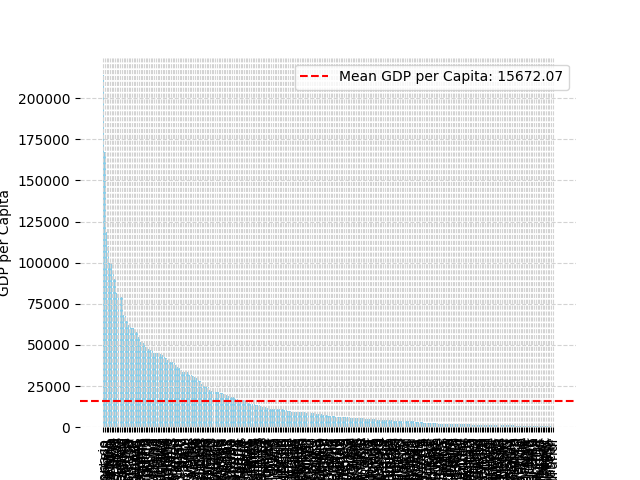

编辑指令: ["Make the chart title 'Top 10 Countries by GDP per capita'"]

===================== 编辑后的图表 (共 1 个) =====================

--- Edited Chart 1 ---


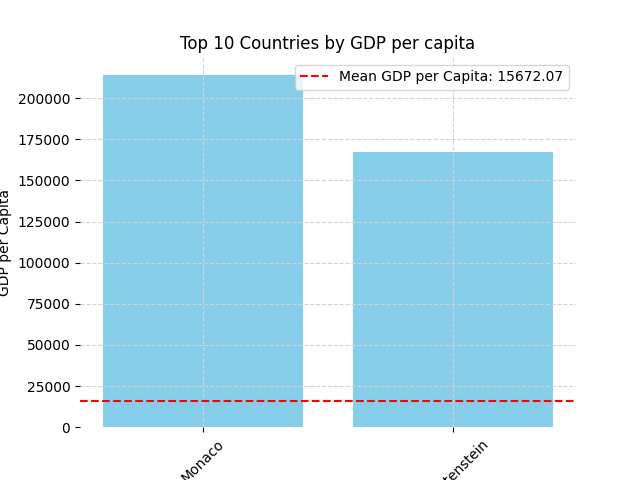

In [ ]:
edited_charts_list = []
if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        original_chart = charts[0]
        print(f"选择图表 (来自 {original_chart.library}) 进行编辑。")
        print("原始图表预览:")
        
        if original_chart.raster and isinstance(original_chart.raster, str):
            image_data = b64decode(original_chart.raster)
            display(Image(data=image_data))
        elif original_chart.raster:
             print(f"原始图表数据 (raster) 不是预期的字符串格式: {type(original_chart.raster)}。无法显示。")
        else:
            print("未能生成原始图表预览 (raster 数据为空)。")

        instructions = [
            "Make the chart title 'Top 10 Countries by GDP per capita'",
        ]
        print(f"编辑指令: {instructions}")

        edit_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True, max_tokens=1500)
        
        edited_chart_results = lida.edit(
            code=original_chart.code,
            summary=summary,
            instructions=instructions,
            library=original_chart.library,
            textgen_config=edit_textgen_config
        )
        
        if edited_chart_results:
            edited_charts_list = edited_chart_results if isinstance(edited_chart_results, list) else [edited_chart_results]
            print(f"\n===================== 编辑后的图表 (共 {len(edited_charts_list)} 个) =====================")
            for i, edited_chart in enumerate(edited_charts_list):
                print(f"\n--- Edited Chart {i+1} ---")
                if edited_chart.raster and isinstance(edited_chart.raster, str):
                    image_data = b64decode(edited_chart.raster)
                    display(Image(data=image_data))
                elif edited_chart.raster:
                    print(f"编辑后的图表数据 (raster) 不是预期的字符串格式: {type(edited_chart.raster)}。无法显示。")
                else:
                    print("未能生成编辑后图表的预览 (raster 数据为空)。")
        else:
            print("编辑图表失败或未返回结果。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法进行编辑。")
else:
    print("错误: 没有可供编辑的图表 'charts'。")

选择图表 (来自 matplotlib) 进行编辑。
原始图表预览:


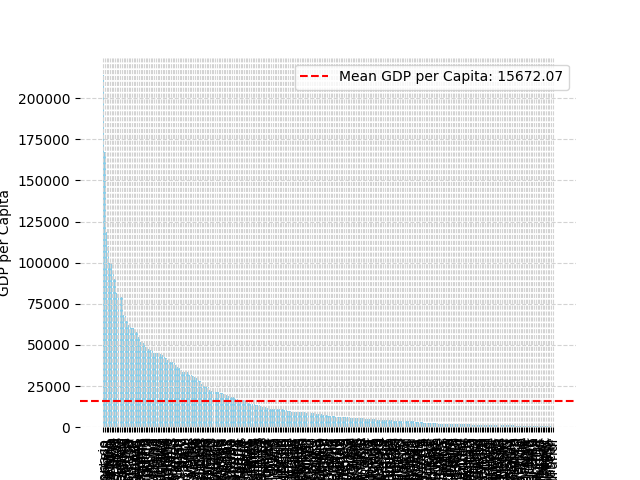

编辑指令: ["Make the chart title 'Top 10 Countries by GDP per capita'"]

===================== 编辑后的图表 (共 1 个) =====================

--- Edited Chart 1 ---


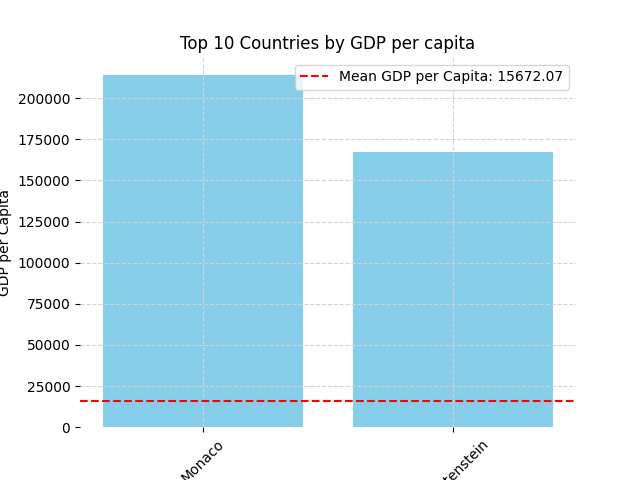

In [ ]:
edited_charts_list = []
if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        original_chart = charts[0]
        print(f"选择图表 (来自 {original_chart.library}) 进行编辑。")
        print("原始图表预览:")
        
        if original_chart.raster and isinstance(original_chart.raster, str):
            image_data = b64decode(original_chart.raster)
            display(Image(data=image_data))
        elif original_chart.raster:
             print(f"原始图表数据 (raster) 不是预期的字符串格式: {type(original_chart.raster)}。无法显示。")
        else:
            print("未能生成原始图表预览 (raster 数据为空)。")

        instructions = [
            "Make the chart title 'Top 10 Countries by GDP per capita'",
        ]
        print(f"编辑指令: {instructions}")

        edit_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True, max_tokens=1500)
        
        edited_chart_results = lida.edit(
            code=original_chart.code,
            summary=summary,
            instructions=instructions,
            library=original_chart.library,
            textgen_config=edit_textgen_config
        )
        
        if edited_chart_results:
            edited_charts_list = edited_chart_results if isinstance(edited_chart_results, list) else [edited_chart_results]
            print(f"\n===================== 编辑后的图表 (共 {len(edited_charts_list)} 个) =====================")
            for i, edited_chart in enumerate(edited_charts_list):
                print(f"\n--- Edited Chart {i+1} ---")
                if edited_chart.raster and isinstance(edited_chart.raster, str):
                    image_data = b64decode(edited_chart.raster)
                    display(Image(data=image_data))
                elif edited_chart.raster:
                    print(f"编辑后的图表数据 (raster) 不是预期的字符串格式: {type(edited_chart.raster)}。无法显示。")
                else:
                    print("未能生成编辑后图表的预览 (raster 数据为空)。")
        else:
            print("编辑图表失败或未返回结果。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法进行编辑。")
else:
    print("错误: 没有可供编辑的图表 'charts'。")

选择图表 (来自 matplotlib) 进行编辑。
原始图表预览:


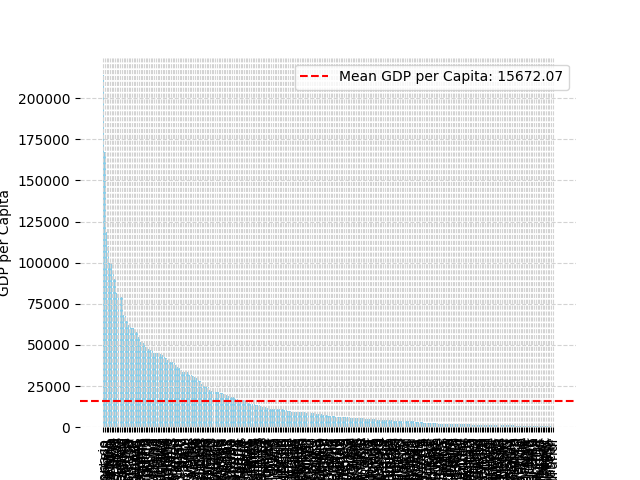

编辑指令: ["Make the chart title 'Top 10 Countries by GDP per capita'"]

===================== 编辑后的图表 (共 1 个) =====================

--- Edited Chart 1 ---


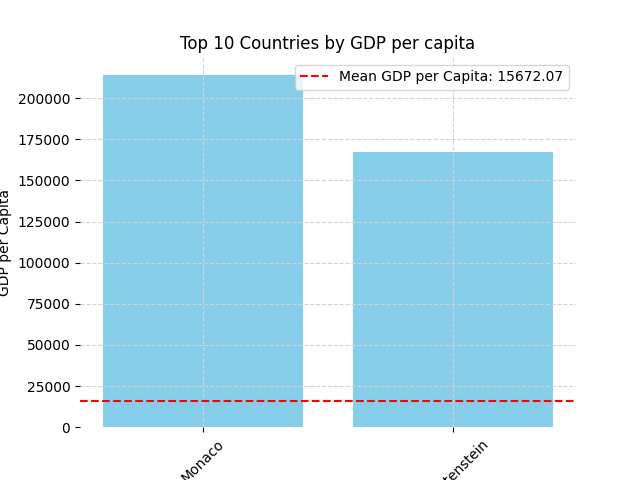

In [ ]:
edited_charts_list = []
if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        original_chart = charts[0]
        print(f"选择图表 (来自 {original_chart.library}) 进行编辑。")
        print("原始图表预览:")
        
        if original_chart.raster and isinstance(original_chart.raster, str):
            image_data = b64decode(original_chart.raster)
            display(Image(data=image_data))
        elif original_chart.raster:
             print(f"原始图表数据 (raster) 不是预期的字符串格式: {type(original_chart.raster)}。无法显示。")
        else:
            print("未能生成原始图表预览 (raster 数据为空)。")

        instructions = [
            "Make the chart title 'Top 10 Countries by GDP per capita'",
        ]
        print(f"编辑指令: {instructions}")

        edit_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True, max_tokens=1500)
        
        edited_chart_results = lida.edit(
            code=original_chart.code,
            summary=summary,
            instructions=instructions,
            library=original_chart.library,
            textgen_config=edit_textgen_config
        )
        
        if edited_chart_results:
            edited_charts_list = edited_chart_results if isinstance(edited_chart_results, list) else [edited_chart_results]
            print(f"\n===================== 编辑后的图表 (共 {len(edited_charts_list)} 个) =====================")
            for i, edited_chart in enumerate(edited_charts_list):
                print(f"\n--- Edited Chart {i+1} ---")
                if edited_chart.raster and isinstance(edited_chart.raster, str):
                    image_data = b64decode(edited_chart.raster)
                    display(Image(data=image_data))
                elif edited_chart.raster:
                    print(f"编辑后的图表数据 (raster) 不是预期的字符串格式: {type(edited_chart.raster)}。无法显示。")
                else:
                    print("未能生成编辑后图表的预览 (raster 数据为空)。")
        else:
            print("编辑图表失败或未返回结果。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法进行编辑。")
else:
    print("错误: 没有可供编辑的图表 'charts'。")

选择图表 (来自 matplotlib) 进行编辑。
原始图表预览:


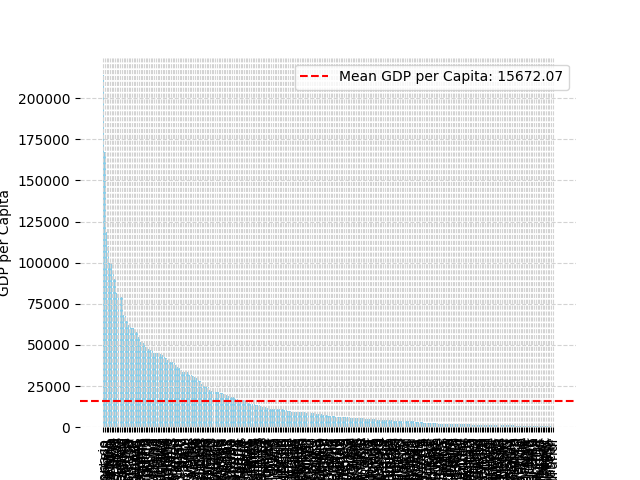

编辑指令: ["Make the chart title 'Top 10 Countries by GDP per capita'"]

===================== 编辑后的图表 (共 1 个) =====================

--- Edited Chart 1 ---


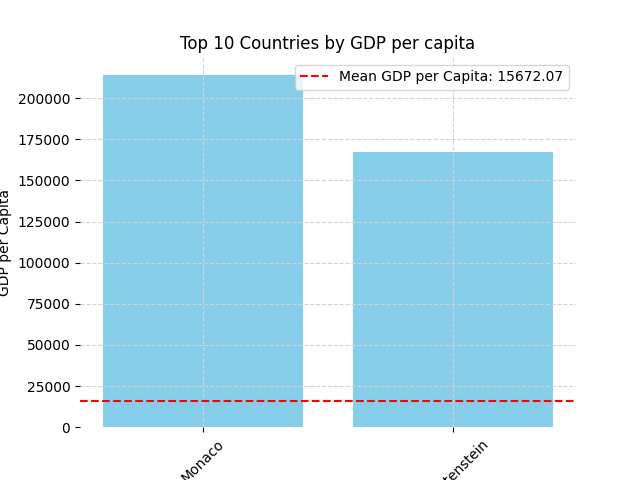

In [ ]:
edited_charts_list = []
if 'charts' in locals() and charts:
    if charts[0] and charts[0].code:
        original_chart = charts[0]
        print(f"选择图表 (来自 {original_chart.library}) 进行编辑。")
        print("原始图表预览:")
        
        if original_chart.raster and isinstance(original_chart.raster, str):
            image_data = b64decode(original_chart.raster)
            display(Image(data=image_data))
        elif original_chart.raster:
             print(f"原始图表数据 (raster) 不是预期的字符串格式: {type(original_chart.raster)}。无法显示。")
        else:
            print("未能生成原始图表预览 (raster 数据为空)。")

        instructions = [
            "Make the chart title 'Top 10 Countries by GDP per capita'",
        ]
        print(f"编辑指令: {instructions}")

        edit_textgen_config = TextGenerationConfig(temperature=0.1, use_cache=True, max_tokens=1500)
        
        edited_chart_results = lida.edit(
            code=original_chart.code,
            summary=summary,
            instructions=instructions,
            library=original_chart.library,
            textgen_config=edit_textgen_config
        )
        
        if edited_chart_results:
            edited_charts_list = edited_chart_results if isinstance(edited_chart_results, list) else [edited_chart_results]
            print(f"\n===================== 编辑后的图表 (共 {len(edited_charts_list)} 个) =====================")
            for i, edited_chart in enumerate(edited_charts_list):
                print(f"\n--- Edited Chart {i+1} ---")
                if edited_chart.raster and isinstance(edited_chart.raster, str):
                    image_data = b64decode(edited_chart.raster)
                    display(Image(data=image_data))
                elif edited_chart.raster:
                    print(f"编辑后的图表数据 (raster) 不是预期的字符串格式: {type(edited_chart.raster)}。无法显示。")
                else:
                    print("未能生成编辑后图表的预览 (raster 数据为空)。")
        else:
            print("编辑图表失败或未返回结果。")
    else:
        print("警告: 选中的原始图表无效或没有代码，无法进行编辑。")
else:
    print("错误: 没有可供编辑的图表 'charts'。")